# Inicializando libraries

In [22]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('fivethirtyeight')

In [23]:
from lol_api.lol_dataset import api,draw_clusters,draw_fuzzy,URL_CSV_TEST
from lol_api.lol_methods import get_pos

test=api()

,Unnamed: 0,accountId,assists,champLevel,champiom,combatPlayerScore,creepsPerMinDeltas,csDiffPerMinDeltas,currentAccountId,currentPlatformId,...,trueDamageTaken,turretKills,unrealKills,visionScore,visionWardsBoughtInGame,wardsKilled,wardsPlaced,win,xpDiffPerMinDeltas,xpPerMinDeltas
40,40,206772826,3,14,223,0,"{'10-20': 2.4, '0-10': 1.2999999999999998, '20...","{'10-20': 0.20000000000000018, '0-10': -0.8500...",206772826,KR,...,402,0,0,75,14,9,38,False,"{'10-20': 0.4000000000000341, '0-10': -38.5999...","{'10-20': 385.8, '0-10': 285.3, '20-30': 401.8}"
41,41,209230380,4,17,50,0,"{'10-20': 11.3, '0-10': 7.3, '20-30': 8.6}",NaN,209230380,KR,...,2686,2,0,26,2,3,15,False,NaN,"{'10-20': 634.7, '0-10': 449.2, '20-30': 603.1}"
42,42,208564646,5,15,121,0,"{'10-20': 1, '0-10': 0.30000000000000004, '20-...","{'10-20': -2.1, '0-10': -0.09999999999999998, ...",208564646,KR,...,2121,0,0,59,5,11,28,False,"{'10-20': -24.5, '0-10': 7.5, '20-30': -35.299...","{'10-20': 479, '0-10': 377.9, '20-30': 431.4}"
43,43,4784576,3,15,110,0,"{'10-20': 8.7, '0-10': 8, '20-30': 7.4}","{'10-20': 0.20000000000000018, '0-10': -0.8500...",4784576,KR,...,522,1,0,16,0,3,10,False,"{'10-20': 0.4000000000000341, '0-10': -38.5999...","{'10-20': 429, '0-10': 291.2, '20-30': 546}"
44,44,3440481,3,17,268,0,"{'10-20': 7.5, '0-10': 8.7, '20-30': 10.5}",NaN,3440481,KR,...,648,1,0,24,1,6,14,False,NaN,"{'10-20': 482.5, '0-10': 472.4, '20-30': 743.9}"
45,45,202093245,16,15,201,0,"{'10-20': 2.3, '0-10': 1.5, '20-30': 1.3}","{'10-20': -0.20000000000000018, '0-10': 0.8500...",202093245,KR,...,763,0,0,79,9,14,34,True,"{'10-20': -0.4000000000000341, '0-10': 38.5999...","{'10-20': 350.8, '0-10': 319.5, '20-30': 532.2}"
46,46,210168207,13,16,113,0,"{'10-20': 3.1, '0-10': 0.4, '20-30': 0.9}","{'10-20': 2.1, '0-10': 0.09999999999999998, '2...",210168207,KR,...,521,1,0,47,11,17,17,True,"{'10-20': 24.5, '0-10': -7.5, '20-30': 35.2999...","{'10-20': 503.5, '0-10': 370.4, '20-30': 466.7}"
47,47,6358198,7,18,41,0,"{'10-20': 10.2, '0-10': 6.1, '20-30': 7.5}",NaN,6358198,KR,...,330,2,0,31,3,4,18,True,NaN,"{'10-20': 611.3, '0-10': 447, '20-30': 598.1}"
48,48,5482776,9,18,18,0,"{'10-20': 8.399999999999999, '0-10': 9.5, '20-...","{'10-20': -0.20000000000000018, '0-10': 0.8500...",5482776,KR,...,318,5,0,44,5,8,15,True,"{'10-20': -0.4000000000000341, '0-10': 38.5999...","{'10-20': 463.2, '0-10': 334.2, '20-30': 902.0..."
49,49,206091414,7,18,8,0,"{'10-20': 7.9, '0-10': 8.3, '20-30': 9.1}",NaN,206091414,KR,...,604,1,0,32,6,2,21,True,NaN,"{'10-20': 524.9, '0-10': 444.1, '20-30': 782.6}"


# PCA

In [24]:
decomposition=test.decomposition("pca",test.Dataset_numerico.columns,3,{"random_state":7,"svd_solver":"full"})
sum(decomposition.model.explained_variance_ratio_)

0.8703176077171394

# Clusterização

In [25]:
#win cluster

def select_win(win):
    if(win==True):
        return 0
    elif(win==False):
        return 1
win_cluster = test.get_cluster_by_features(test.Dataset_numerico.columns,"win", select_win)
test.Cluster=win_cluster
win_cluster_transform,win_cluster_centroids=test.get_clusters_transformed()

In [26]:
# kmeans cluster
kmeans_cluster=test.cluster("kmeans",test.Dataset_numerico.columns,{"n_clusters":5,"random_state":0})
kmeans_cluster_transform,kmeans_cluster_centroids=test.get_clusters_transformed()
kmeans_cluster_transform_kwargs={"sup":kmeans_cluster_transform[3],"adc":kmeans_cluster_transform[1],
                                "jg":kmeans_cluster_transform[0],"top":kmeans_cluster_transform[2],
                                "mid":kmeans_cluster_transform[4]}
kmeans_cluster_transform=[value for value in kmeans_cluster_transform_kwargs.values()]


In [27]:
# fuzzy cluter and fpc
fuzzy_cluster=test.cluster("fuzzy",test.Dataset_numerico.columns,{})
fuzzy_cluster_transform,fuzzy_cluter_centroids=test.get_clusters_transformed()
fuzzy_cluster_transform_kwargs={"sup":fuzzy_cluster_transform[3],"adc":fuzzy_cluster_transform[1],
                                "jg":fuzzy_cluster_transform[0],"top":fuzzy_cluster_transform[2],
                                "mid":fuzzy_cluster_transform[4]}
fuzzy_cluster_transform=[value for value in kmeans_cluster_transform_kwargs.values()]
fuzzy_cluster.model.fpc

0.52202715726518623

In [28]:
# lane cluster

def select_lane(array):
    lane=array[0]
    role=array[1]
    pos=get_pos(lane,role)
    label=0
    if(pos=="sup"):
        label=1
    elif(pos=="adc"):
        label=2
    elif(pos=="jg"):
        label=3
    elif(pos=="top"):
        label=4
    elif(pos=="mid"):
        label=5
    return label

position_cluster = test.get_cluster_by_features(test.Dataset_numerico.columns,["lane","role"], select_lane)
test.Cluster=position_cluster
lane_cluster_transform,lane_cluster_centroids=test.get_clusters_transformed()

# Plotting

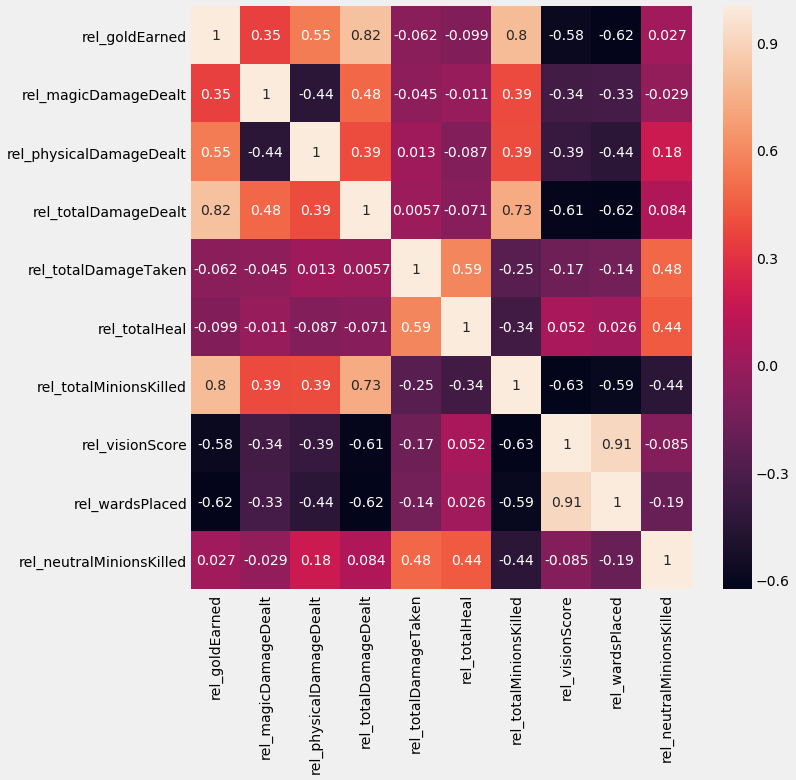

In [29]:
#correlation heatmap
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111)

snb.heatmap(test.Dataset_numerico.corr(),annot=True,ax=ax)


In [30]:
#pairplot


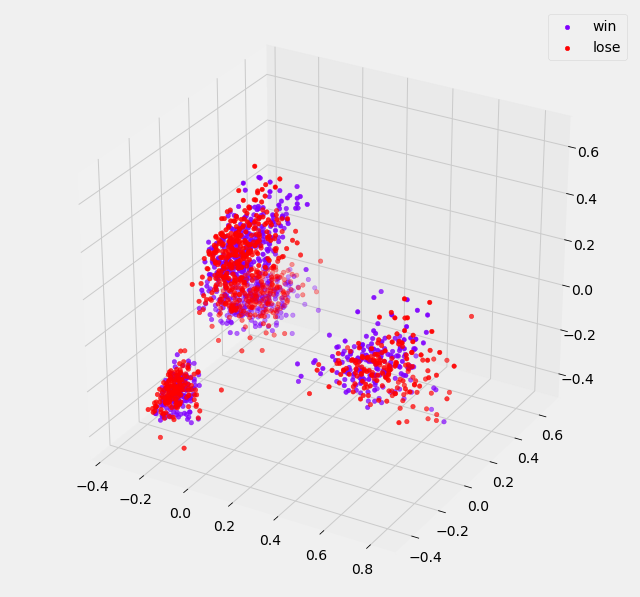

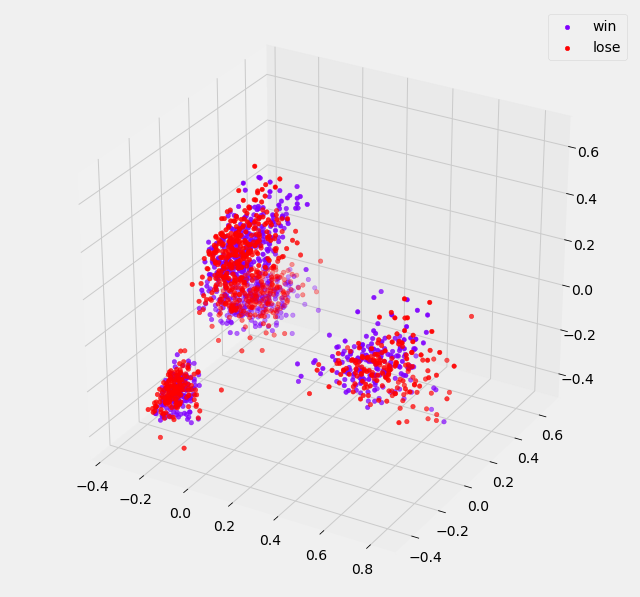

In [31]:
#plot win cluster

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection="3d")
draw_clusters(ax,win_cluster_transform,"3d",labels=["win","lose"])
fig

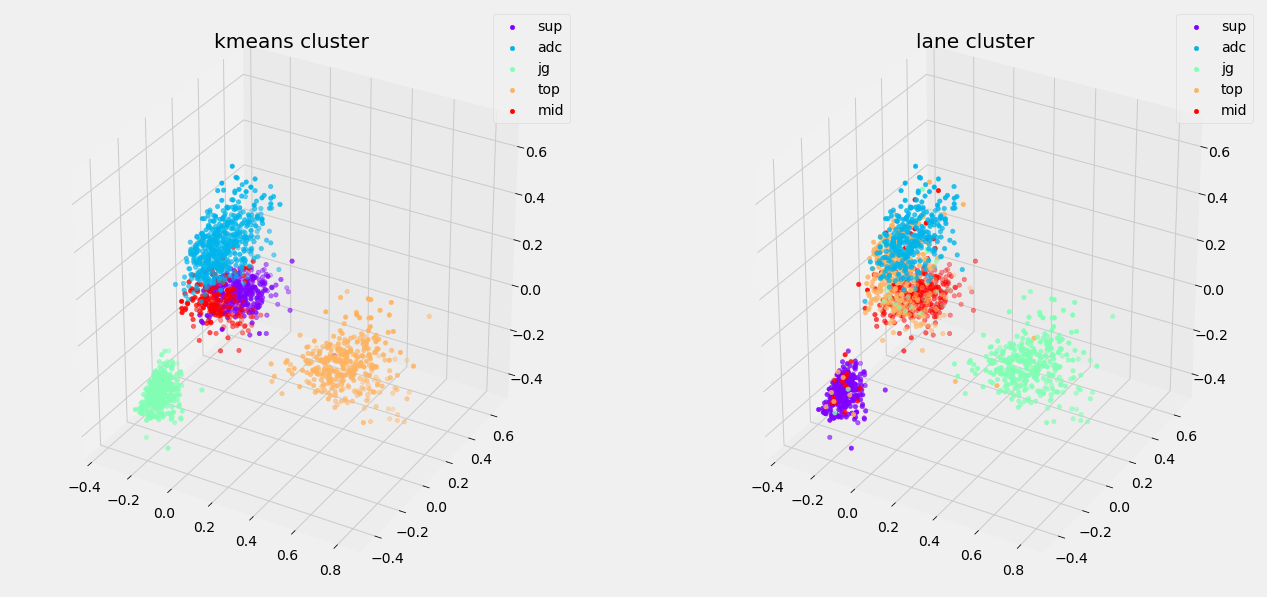

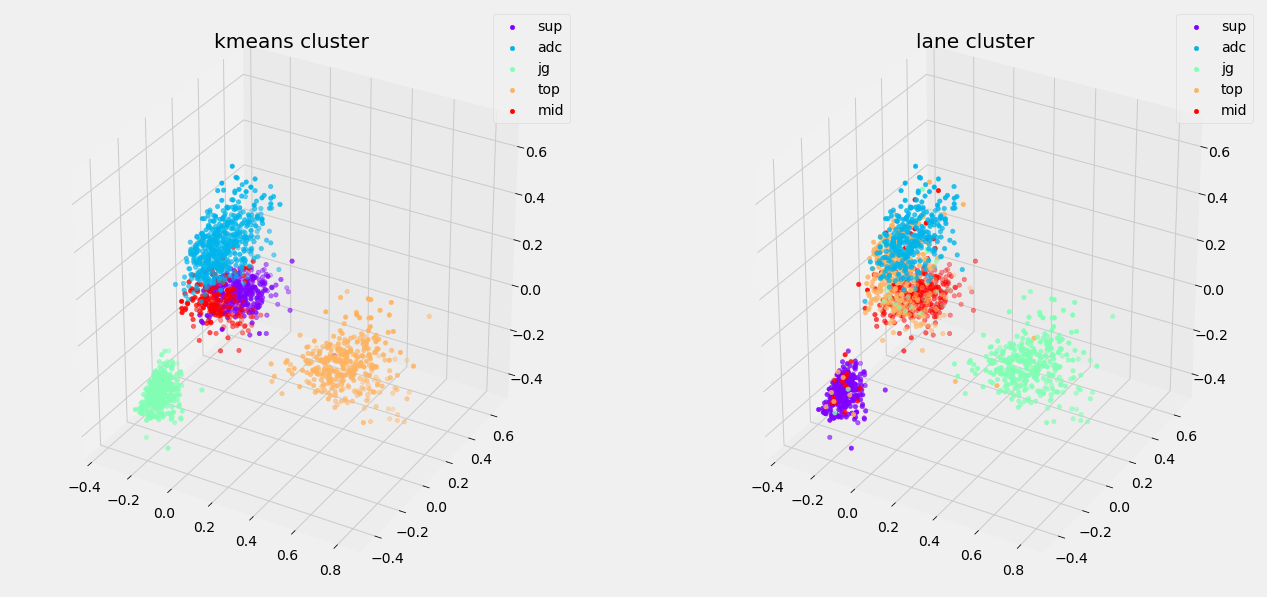

In [32]:
#plot kmeans_cluster and lane clusters

fig=plt.figure(figsize=(20,10))
ax=fig.add_subplot(121,projection="3d")
draw_clusters(ax,kmeans_cluster_transform,"3d",labels=["sup","adc","jg","top","mid"])
ax.set_title("kmeans cluster")
ax2=fig.add_subplot(122,projection="3d")
draw_clusters(ax2,lane_cluster_transform[1:],"3d",labels=["sup","adc","jg","top","mid"])
ax2.set_title("lane cluster")
fig

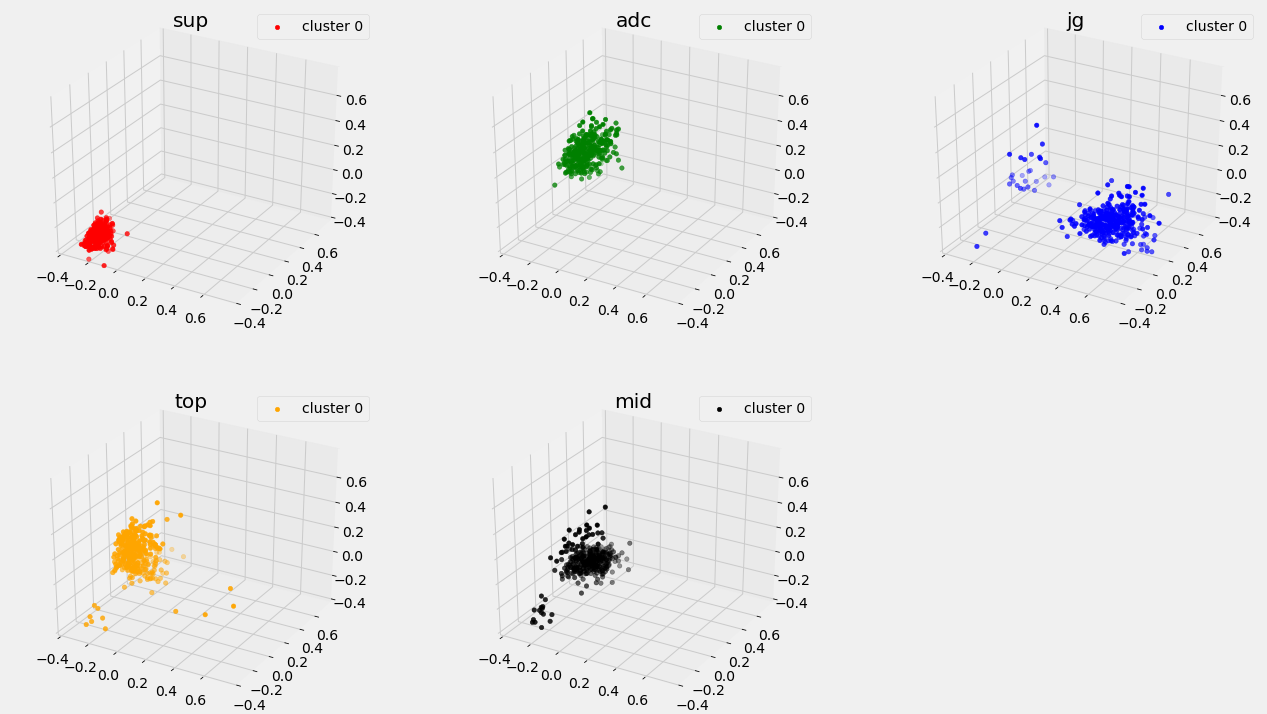

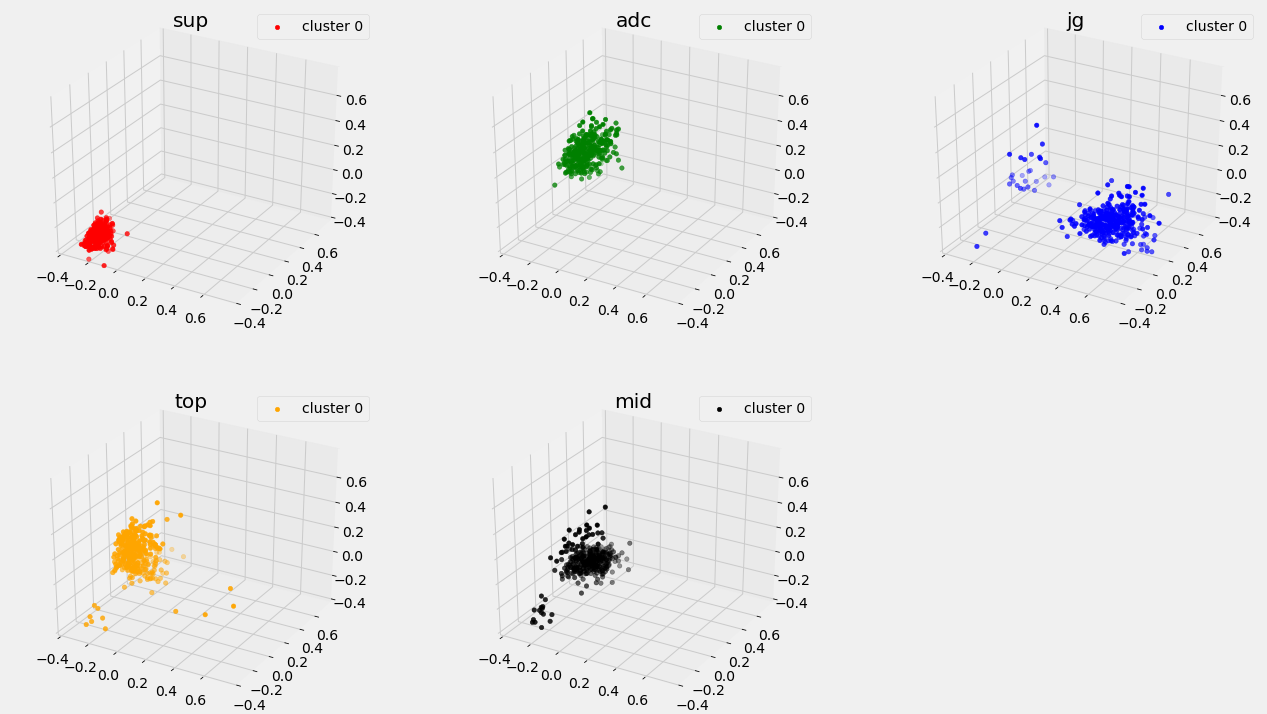

In [33]:
#plot separate lane clusters

fig=plt.figure(figsize=(20,12))

labels=["sup","adc","jg","top","mid"]
colors=["r","g","b","orange","black"]

for cont,label_name,color in zip(range(1,len(lane_cluster_transform)),labels,colors):
    ax=fig.add_subplot(2,3,cont,projection="3d")
    draw_clusters(ax,[lane_cluster_transform[cont]],"3d",colors=[color])
    ax.set_title(label_name)
    ax.set_xlim3d(-0.4,0.8)
    ax.set_ylim3d(-0.4,0.8)
    ax.set_zlim3d(-0.4,0.8)
    
fig

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles wi

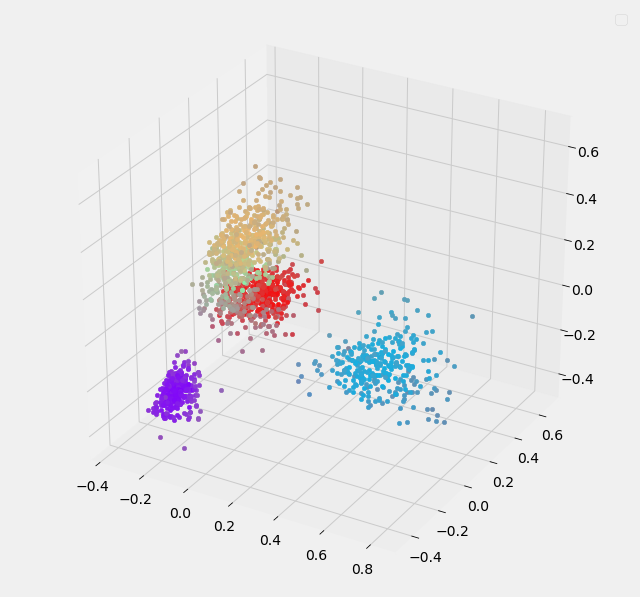

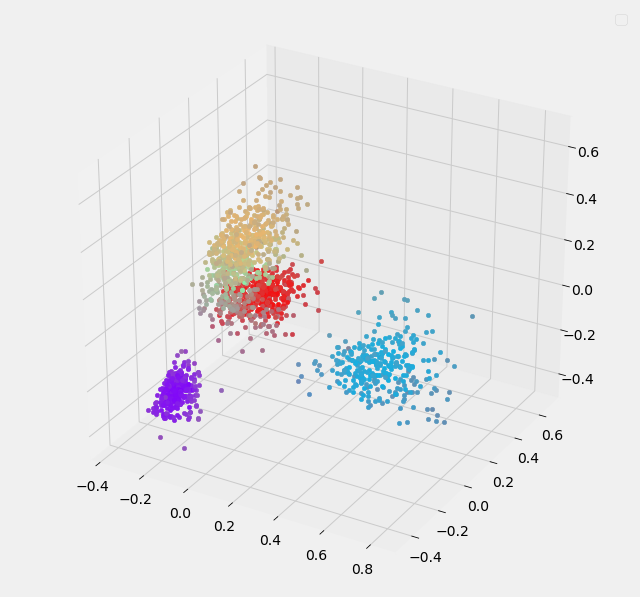

In [34]:
# fuzzy cluter
fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection="3d")
draw_fuzzy(ax,test.get_data_transformed(),fuzzy_cluster.model.transpose_fuzzy_partitioned_matrix,"3d")
fig

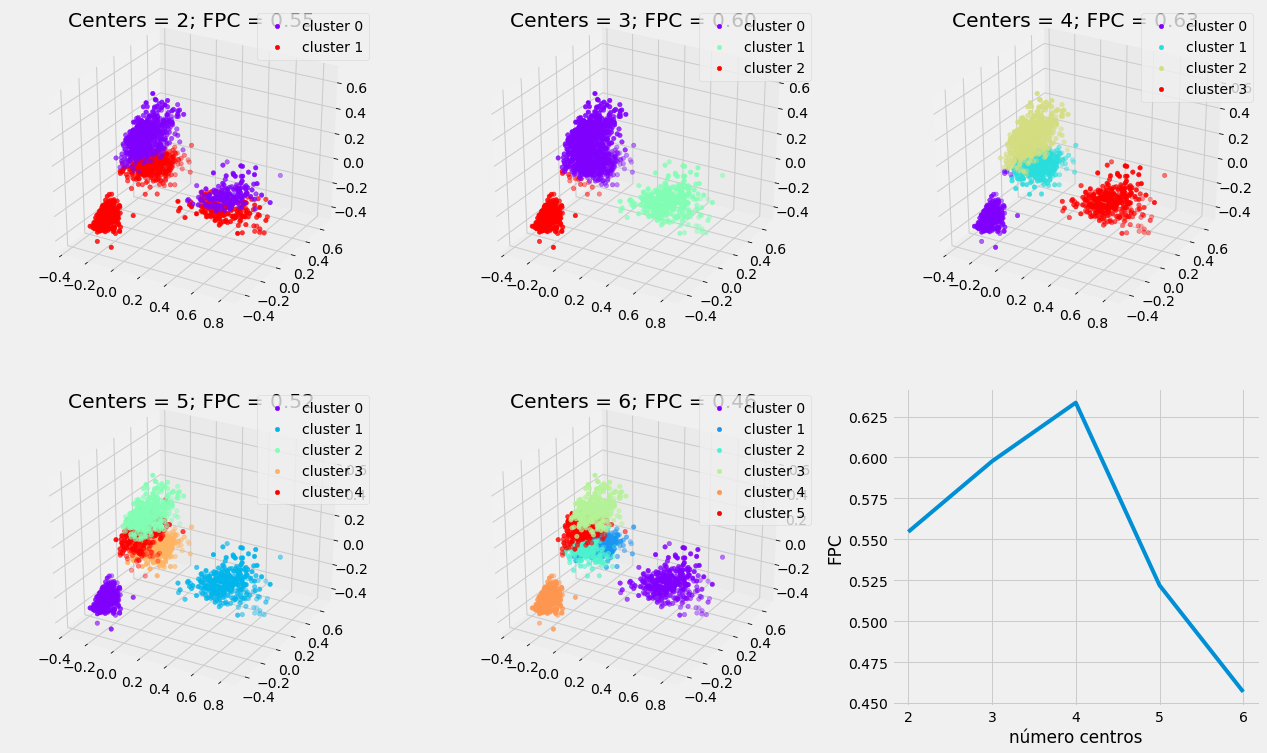

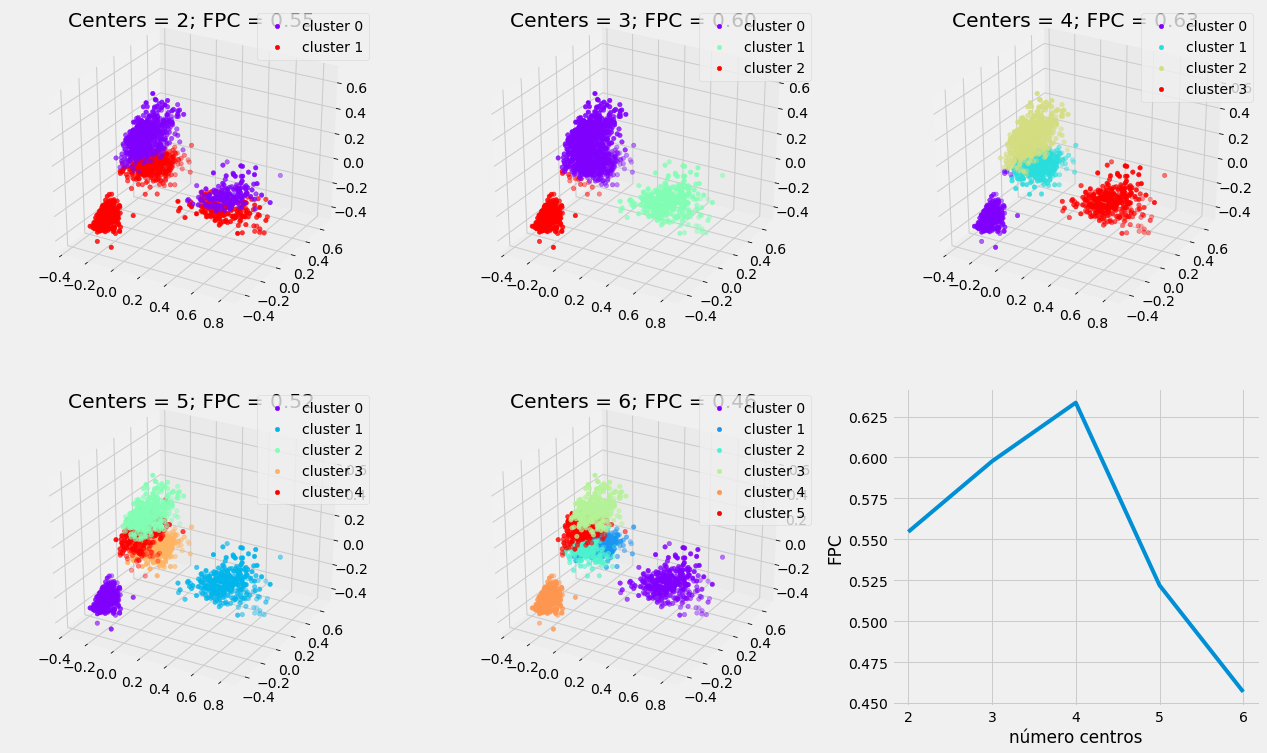

In [35]:
# fuzzy fpc plot
fig=plt.figure(figsize=(20,12))

max_nCluster=7
fpc_array=[]

for n_clusters in range(2,max_nCluster):
    ax=fig.add_subplot(2,3,n_clusters-1,projection="3d")
    _fuzzy_cluster=test.cluster("fuzzy",test.Dataset_numerico.columns,{"ncenters":n_clusters})
    _fuzzy_cluster_transform,_fuzzy_cluster_centroids=test.get_clusters_transformed()
    fpc_array.append(_fuzzy_cluster.model.fpc)
    draw_clusters(ax,_fuzzy_cluster_transform,"3d")
    ax.set_title('Centers = {0}; FPC = {1:.2f}'.format(n_clusters, _fuzzy_cluster.model.fpc))

ax=fig.add_subplot(2,3,max_nCluster-1)
ax.plot(range(2,max_nCluster),fpc_array)
ax.set_xlabel("número centros")
ax.set_ylabel("FPC")

fig

In [36]:
# cluster kmeans evaluation

from sklearn import metrics

labels_true=[]
labels_pred=[]

for label_1,label_2 in zip(kmeans_cluster.model.labels_,position_cluster.model.labels_):
    if(label_2!=0):
        labels_true.append(label_1)
        labels_pred.append(label_2-1)


metrics_array=[]
metrics_array.append(["adjusted_rand_score",metrics.adjusted_rand_score(labels_true,labels_pred)])
metrics_array.append(["adjusted_mutual_info_score",metrics.adjusted_mutual_info_score(labels_true,labels_pred)])
metrics_array.append(["homogeneity_score",metrics.homogeneity_score(labels_true,labels_pred)])
metrics_array.append(["completeness_score",metrics.completeness_score(labels_true,labels_pred)])

cluster_evaluation_dataframe=pd.DataFrame(columns=["evaluate method name","value"],data=metrics_array)

cluster_evaluation_dataframe


,evaluate method name,value
0,adjusted_rand_score,0.612752
1,adjusted_mutual_info_score,0.646307
2,homogeneity_score,0.665700
3,completeness_score,0.647358


In [37]:
# cluster fuzzy evaluation


In [38]:
# kmeans clusters centroids

dataframe_kmeans=pd.DataFrame(columns=[test.Dataset_numerico.columns],data=kmeans_cluster.model.cluster_centers_)
dataframe_kmeans["posição"]=["Jungle","Ad carray","Top","Support","Mid"]
dataframe_kmeans

,rel_goldEarned,rel_magicDamageDealt,rel_physicalDamageDealt,rel_totalDamageDealt,rel_totalDamageTaken,rel_totalHeal,rel_totalMinionsKilled,rel_visionScore,rel_wardsPlaced,rel_neutralMinionsKilled,posição
0,0.147313,0.049194,0.021489,0.061064,0.165932,0.180810,0.055865,0.345311,0.380988,0.003778,Jungle
1,0.228008,0.088274,0.421238,0.249244,0.180989,0.137519,0.307279,0.150487,0.137678,0.117298,Ad carray
2,0.187271,0.149047,0.225499,0.180754,0.265462,0.335633,0.048512,0.206538,0.187988,0.680643,Top
3,0.223091,0.559175,0.035786,0.289934,0.178603,0.138282,0.299114,0.152261,0.149290,0.121608,Support
4,0.201794,0.296476,0.119620,0.201171,0.231348,0.265361,0.270558,0.142994,0.152902,0.047354,Mid
